## Pandas

**Pandas:** Python library for exploration, manipulation, and analysis

In [1]:
# import pandas
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('data/Advertising.csv', index_col=0)
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:
* **Data frame**: rows and columns (spreadsheet)
* **Series**: a single column

In [3]:
# display last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the dataframe
data.shape

(200, 4)

### Features
* **TV**: dollars spent on TV advertising for a single product
* **Radio**: advertising dollars spent on radio
* **Newspaper**: advertiding dollars spent on newspaper
### Respose
**Sales**: sales of a single product (in thousand of items)
### Other information
* Response is continuous, this is a **regression problem**
* There are 200 **observations** (represented by rows), and each observation is a single market

## Visualizing data ising seaborn

**Seaborn** Python library for statistical data visualization built on top of **matplotlib**

In [5]:
import seaborn as sns

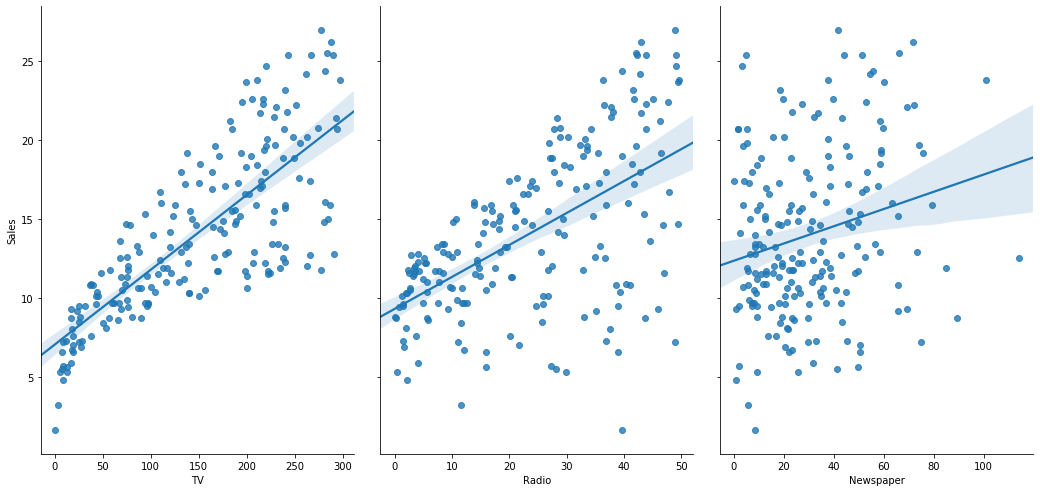

In [6]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], 
             y_vars='Sales', height=7, aspect=0.7, kind='reg')

Increase size of the plots: `height=7, size=0.7`

Best fit and a 95% confidence band: `kind='reg'`

## Linear regression
* Fast, no tuning required, highly interpretable, well-understood
* Unlikely to produce the best predictive accuracy (assumes a linear relation between the features and the response)

### Form of linear regression
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$
where $y$ is the response and $x_1, \dots,x_n$ are features. The $\beta$-values are called the **model coefficients**. 

## Preparing X and y using pandas

* scikit-learn expects X (feature matrix) and y (reponse vector) to be NumPy arrays
* Pandas is buil on top of NumPy
* X can be a pandas dataframe and y can be a pandas series

In [7]:
# Create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the origal dataframe
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# Check the type and the shape fo X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# Select a series from the dataframe
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


By default dataset are splited in 75% for training and 25% for testing

## Linear regression in scikit-learn

In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting model coefficients

In [14]:
# Print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


$$
y=2.87696662231793 + 0.04656457\times TV + 0.17915812 \times Radio + 0.00345046 \times Newspaper
$$

In [15]:
# Pair the features names with the coefficients
zip(feature_cols, linreg.coef_)

* Here we have found an **association** relation, NOT **causation**

### Making prediction

In [19]:
# make prediction on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compate our predictions with the actual values

**Mean Absolute Error**(MAE)
$$
\frac{1}{n} \sum_{i=1}^n |y_i-\hat{y}_i|
$$

**Mean Squared Error**(MSE)
$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2
$$

**Root Mean Squared Error**(RMSE)
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

**Comparing metrics**:
* **MAE** is the easiest to understand, because it's the average error
* **MSE** is more popular than MAE, because MSE 'punishes' large errors
* **RMSE** is even more popular than MSE because RMSE is interpretable in the y units

###  Computing the RMSE for our Sales predictions

In [21]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


##  Feature selection
Does **Newspaper** belongs in our model? 

Let's remove it from the model and check the RMSE

In [24]:
# Create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original dataframe
X = data[feature_cols]

# select a series from the dataframe
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linreg.predict(X_test)

# Compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE decreased when we removed Newspaper from the model. Thus, it is unlikely that this feature is useful for predicting sales, and should be removed from the model.